In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
data = pd.read_csv('world-happiness-report-2021.csv') #basically load dataset and preview
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
# Exracting columns for further analysis of data

columns_name = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support',
                'Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
data = data[columns_name].copy()
df_happy = data.rename(columns={'Ladder score':'Happiness score','Regional indicator':'Region'})
df_happy.head()

,Country name,Region,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [5]:
df_happy.isnull().sum() # Check for null values

Country name                    0
Region                          0
Happiness score                 0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

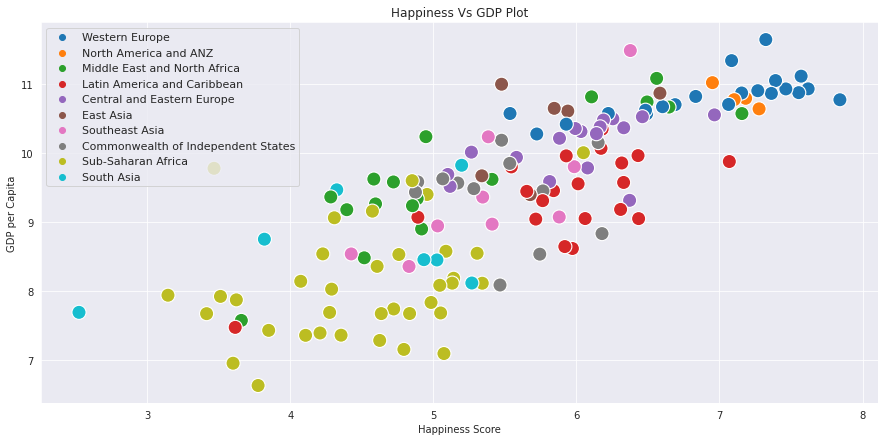

In [ ]:
# Happiness Vs GDP plot comparision multi variate

sns.set_style('darkgrid')#style 
plt.rcParams['figure.figsize'] = (15,7)#size of plot
plt.title("Happiness Vs GDP Plot")#title aapva mate
sns.scatterplot(x = df_happy['Happiness score'], y= df_happy['Logged GDP per capita'], hue=df_happy['Region'], s =200)#hue ma contry lidhi che
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.legend(loc='upper left', fontsize=11)

uper darshavel plot multivariate che.

Text(0, 0.5, '')

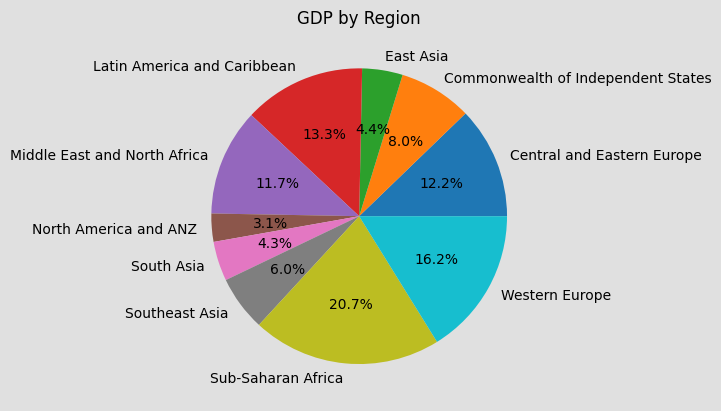

In [6]:
# GDP by Region

plt.rcParams['figure.facecolor']='#E0E0E0'
Region_GDP = df_happy.groupby('Region')['Logged GDP per capita'].sum() 
Region_GDP.plot.pie(autopct='%1.1f%%')
plt.title("GDP by Region")
plt.ylabel('')

bivariate che pei chart

In [7]:
# Number of Countries in each Region
countries_region = df_happy.groupby('Region')[['Country name']].count()
countries_region

,Country name
Region,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


<AxesSubplot:>

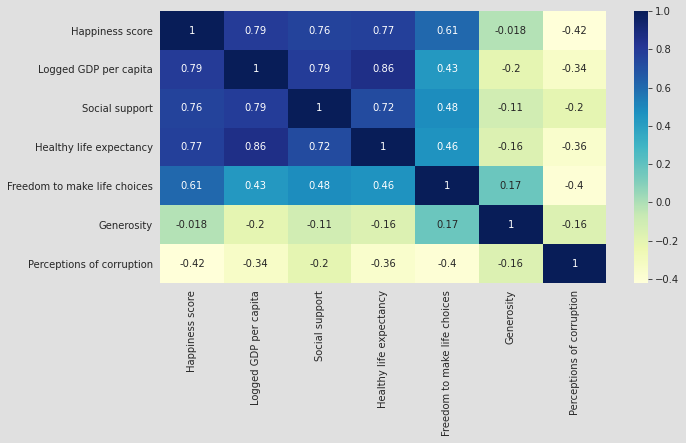

In [55]:
# Correlation Map

cor = df_happy.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='YlGnBu',ax=ax)

multivariate eda analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Central and Eastern Europe'),
  Text(1, 0, 'Commonwealth of Independent States'),
  Text(2, 0, 'East Asia'),
  Text(3, 0, 'Latin America and Caribbean'),
  Text(4, 0, 'Middle East and North Africa'),
  Text(5, 0, 'North America and ANZ'),
  Text(6, 0, 'South Asia'),
  Text(7, 0, 'Southeast Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Western Europe')])

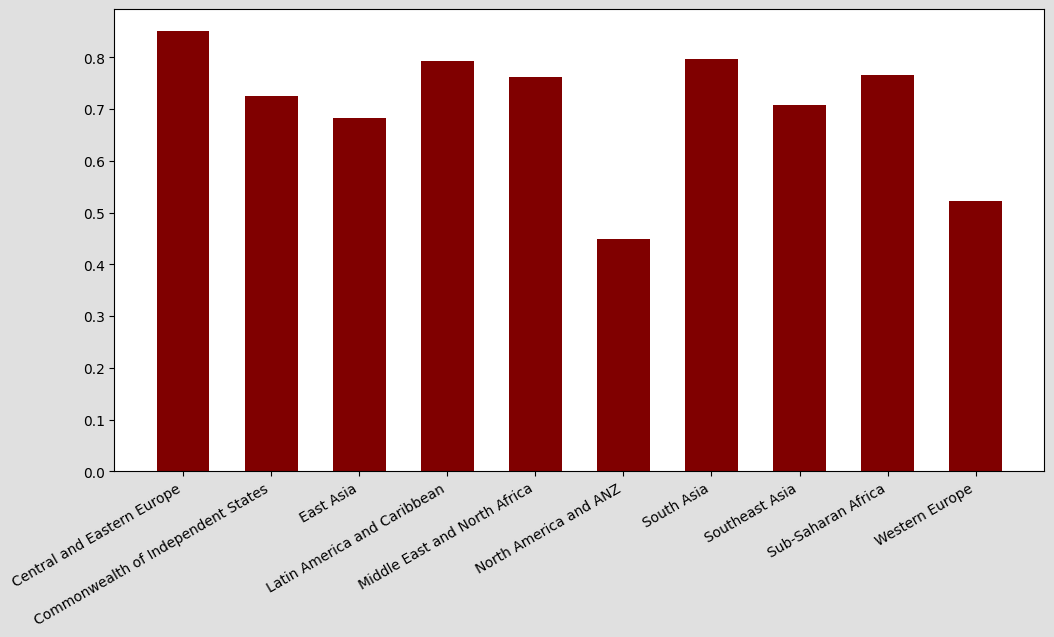

In [8]:
# Average corruption per Region

corruption = df_happy.groupby('Region')[['Perceptions of corruption']].mean()
plt.rcParams['figure.figsize'] = (12,6)
plt.bar(corruption.index, corruption['Perceptions of corruption'],color='maroon',width = 0.6)
plt.xticks(rotation=30,ha='right')

Text(0.5, 1.0, 'Bottom 10 least happy countries Life Expectancy')

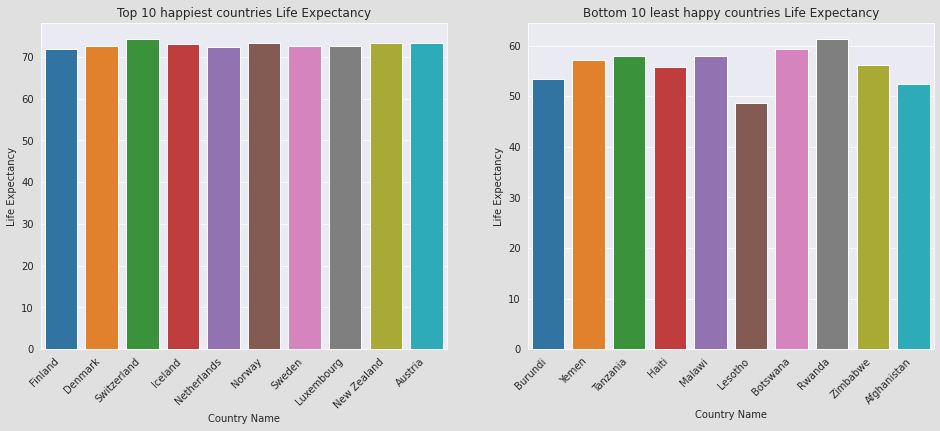

In [77]:
# Top 10 and bottom 10 happiest countries

top_10 = df_happy.head(10)
bottom_10 = df_happy.tail(10)

fig, axes = plt.subplots(1,2,figsize=(16,6))
sns.barplot(x=top_10['Country name'], y=top_10['Healthy life expectancy'],ax=axes[0])
axes[0].set_xlabel("Country Name")
axes[0].set_ylabel("Life Expectancy")
axes[0].set_xticklabels(top_10['Country name'],rotation =45, ha='right')
axes[0].set_title("Top 10 happiest countries Life Expectancy")

sns.barplot(x=bottom_10['Country name'], y=bottom_10['Healthy life expectancy'],ax=axes[1])
axes[1].set_xlabel("Country Name")
axes[1].set_ylabel("Life Expectancy")
axes[1].set_xticklabels(bottom_10['Country name'],rotation =45, ha='right')
axes[1].set_title("Bottom 10 least happy countries Life Expectancy")

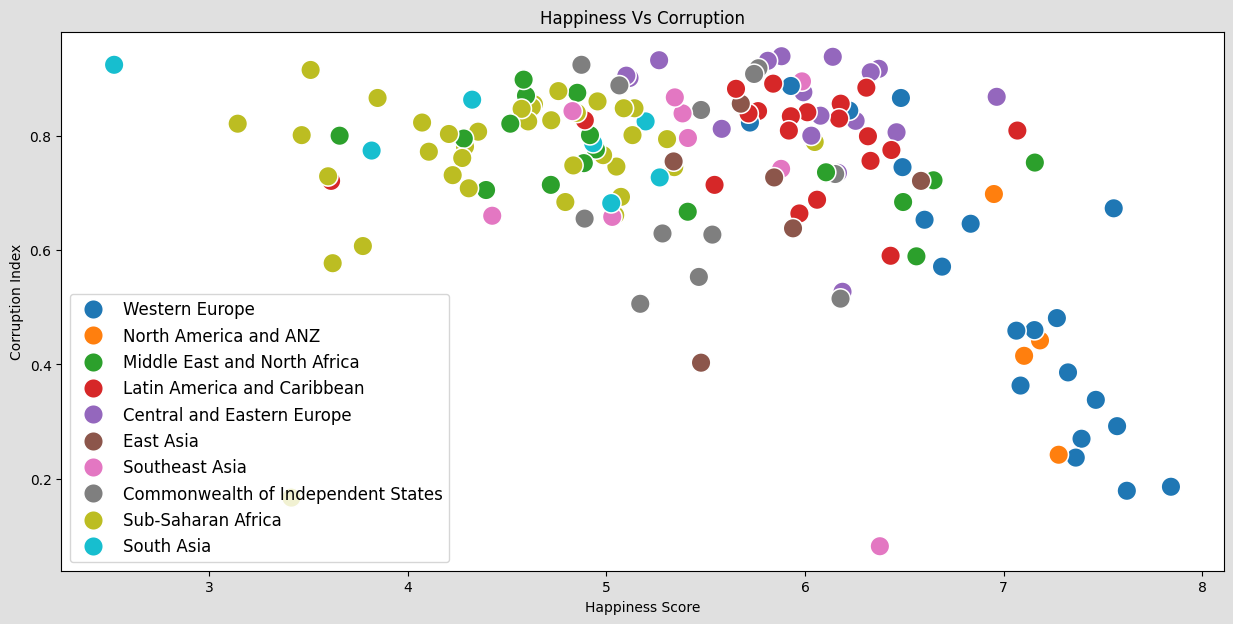

In [9]:
# Happiness Score Vs Corruption


plt.rcParams['figure.figsize'] = (15,7)
plt.title("Happiness Vs Corruption")
sns.scatterplot(x = df_happy['Happiness score'], y= df_happy['Perceptions of corruption'], hue=df_happy['Region'], s =200)
plt.xlabel('Happiness Score')
plt.ylabel('Corruption Index')
plt.legend(loc='lower left', fontsize=12)